# ZTF-TESS Plotting

In [1]:
import os

import matplotlib.pyplot as plt

from plotting import plot_pb_seperated

parameters = {
        "norm": False,
        "to_bin": True,
        "bin_interval": "0.5D",
        "time_scale": "trigger",
        "convert_to_mag": False,
        "sub_bg_model": False,
        "remove_extinction": True,
        "median_filter": True,
        "window_size": "2.5D",
        # ztf_tess alignment params
        "scale_factor": 180,
        "optimize_scale":True,
        "manual_diff_corr": 0
    }
ztf_data = os.listdir("TESS_data/ztf_data/")

In [2]:
for file in ztf_data:
    name = file.split(".")[0]
    print(name)
    plot_pb_seperated(file, parameters, save=True, save_name=name)


2018fzi_ZTF18abtkqkb_exitcode62
2018gku_ZTF18abwoxal_exitcode62
2018grv_ZTF18abwerpm_exitcode62
2018gxi_ZTF18abzscns_exitcode62
2018hgl_ZTF18acbxshd_exitcode62
2018hka_ZTF18acbudzh_exitcode62
2018hkb_ZTF18acbudzo_exitcode62
2018hrs_ZTF18acbufud_exitcode62
2018hsf_ZTF18acbvpzj_exitcode62
2018huc_ZTF18acbvcmw_exitcode62
2018hue_ZTF18abxrngw_exitcode62
2018hum_ZTF18abuwcul_exitcode62
2018hxq_ZTF18abyiusv_exitcode62
2018hyy_ZTF18acckoil_exitcode62
2018ien_ZTF18abvfisg_exitcode62
2018iez_ZTF18acebtdv_exitcode62
2018ifh_ZTF18accjwuo_exitcode62
2018ijn_ZTF18acfvhko_exitcode62
2018ime_ZTF18achoord_exitcode62
2018iti_ZTF18achqdch_exitcode62
2018itr_ZTF18acmyxfx_exitcode62
2018iuj_ZTF18acmyhbd_exitcode62
2018iwg_ZTF18abwbcjx_exitcode62
2018iwl_ZTF18abzyvbt_exitcode62
2018iyh_ZTF18acmwyya_exitcode62
2018iyx_ZTF18acptgzz_exitcode62
2018izg_ZTF18acrcshq_exitcode62
2018jco_ZTF18acrkngz_exitcode62
2018jeb_ZTF18acpuxuh_exitcode62
2018jfk_ZTF17aabgaoo_exitcode62
2018jih_ZTF18acskpvl_exitcode61
2018jjs_

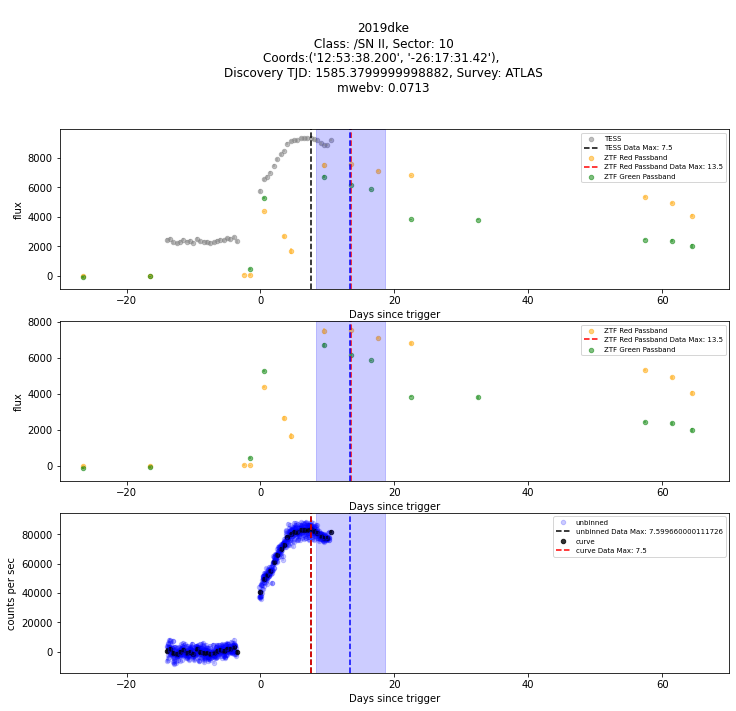

In [102]:
from plotting import plot_pb_seperated

test = ztf_data[1]
test = "2019dke_ZTF19aatevrp_exitcode0.csv"

ax = plot_pb_seperated(test, parameters)

## categorize curves by labels

In [3]:
import shutil
import pandas as pd
import os
from preprocess import find_by_tess_name

def remove_dir_files(dir):
    for f in os.listdir(dir):
        os.remove(os.path.join(dir, f))

labels = pd.read_csv("./TESS_data/curve_labels.csv")
plot_dir = f"./TESS_data/ztf_tess_plots/labels/"
good_dir = plot_dir + "good"
maybe_dir = plot_dir + "maybe"
great_dir = plot_dir + "great"
dataset_dir = plot_dir + "dataset"
bad_dir = plot_dir + "bad_scale"

remove_dir_files(good_dir)
remove_dir_files(maybe_dir)
remove_dir_files(great_dir)
remove_dir_files(dataset_dir)
remove_dir_files(bad_dir)


tess_good = (labels["tess_good"] == True)
tess_maybe = (labels["tess_maybe"] == True)
tess_great = (labels["tess_great"] == True)
ztf_good = (labels["ztf_good"] == True)
ztf_maybe = (labels["ztf_maybe"] == True)
ztf_great = (labels["ztf_great"] == True)

great = ztf_great | tess_great
good = (tess_good | ztf_good) & (~great)
maybe = (tess_maybe | ztf_maybe) & ~great & ~good

good_labels = labels[good]["curve_name"]
maybe_labels = labels[maybe]["curve_name"]
great_labels = labels[great]["curve_name"]
dataset_labels = labels[(ztf_maybe & tess_maybe) | tess_good | tess_great | ztf_good | ztf_great]["curve_name"]
bad_scale_labels = labels[(labels["bad_scale"] == True)]["curve_name"]

all_dir = "./TESS_data/ztf_tess_plots/all/"

for file in maybe_labels:
    shutil.copy(f"./TESS_data/ztf_tess_plots/all/{find_by_tess_name(file).split('.')[0]}.png", maybe_dir)

for file in good_labels:
    shutil.copy(f"./TESS_data/ztf_tess_plots/all/{find_by_tess_name(file).split('.')[0]}.png", good_dir)

for file in great_labels:
    shutil.copy(f"./TESS_data/ztf_tess_plots/all/{find_by_tess_name(file).split('.')[0]}.png", great_dir)

for file in dataset_labels:
    shutil.copy(f"./TESS_data/ztf_tess_plots/all/{find_by_tess_name(file).split('.')[0]}.png", dataset_dir)

for file in bad_scale_labels:
    shutil.copy(f"./TESS_data/ztf_tess_plots/all/{find_by_tess_name(file).split('.')[0]}.png", bad_dir)

## Fix Bad Scaled Curves

In [4]:
to_process = ["2018kfv_ZTF18acwutbr_exitcode57.csv",      "2018koy_ZTF18adaifep_exitcode0.csv",
                  "2019bwu_ZTF19aamsjlt_exitcode61.csv", "2020dya_ZTF20aasijew_exitcode56.csv",
                  "2020ebr_ZTF20aarjgox_exitcode56.csv", "2021abbl_ZTF21achcwnd_exitcode56.csv",
                  "2021dsb_ZTF21aamucom_exitcode56.csv", "2021hup_ZTF21aarhnwn_exitcode0.csv",
                  "2021rgm_ZTF21abilrxd_exitcode61.csv","2021ucq_ZTF21abouexm_exitcode56.csv",
                  "2021xzf_ZTF21abyfxqr_exitcode56.csv", "2022dma_ZTF22aabwfss_exitcode0.csv"]

parameters["optimize_scale"] = False
for name in to_process:
    plot_pb_seperated(name, parameters, save=True, save_name=name.split(".")[0], save_dir="./TESS_data/ztf_tess_plots/fixed_bad_scale/")

# 2018ksr
parameters["scale_factor"] = 80
to_process = ["2018ksr_ZTF18adaivyd_exitcode56.csv"]
for name in to_process:
    plot_pb_seperated(name, parameters, save=True, save_name=name.split(".")[0], save_dir="./TESS_data/ztf_tess_plots/fixed_bad_scale/")

# 2020fcw, 2022eat
parameters["scale_factor"] = 180
parameters["manual_diff_corr"] = 5000
to_process = ["2020fcw_ZTF20aattotq_exitcode0.csv", "2022eat_ZTF22aacrugz_exitcode57.csv"]
for name in to_process:
    plot_pb_seperated(name, parameters, save=True, save_name=name.split(".")[0], save_dir="./TESS_data/ztf_tess_plots/fixed_bad_scale/")

# 2018hxq
parameters["manual_diff_corr"] = 600
to_process = ["2018hxq_ZTF18abyiusv_exitcode62.csv"]
for name in to_process:
    plot_pb_seperated(name, parameters, save=True, save_name=name.split(".")[0], save_dir="./TESS_data/ztf_tess_plots/fixed_bad_scale/")


# 2022dyu, 2022eaz, 2022een
parameters["manual_diff_corr"] = 1200
to_process = ["2019axj_ZTF19aajwjwq_exitcode61.csv", "2022een_ZTF22aacrwal_exitcode0.csv", "2022dyu_ZTF22aacdkzo_exitcode56.csv",
 "2022eaz_ZTF18aahvpcy_exitcode0.csv"]
for name in to_process:
    plot_pb_seperated(name, parameters, save=True, save_name=name.split(".")[0], save_dir="./TESS_data/ztf_tess_plots/fixed_bad_scale/")

# 2019bip
parameters["scale_factor"] = 800
parameters["manual_diff_corr"] = 6500
to_process = ["2019bip_ZTF19aallimd_exitcode56.csv"]
for name in to_process:
    plot_pb_seperated(name, parameters, save=True, save_name=name.split(".")[0], save_dir="./TESS_data/ztf_tess_plots/fixed_bad_scale/")

#2018lot
parameters["scale_factor"] = 50
parameters["manual_diff_corr"] = -10000
to_process = ["2018lot_ZTF17aaabgiw_exitcode0.csv"]
for name in to_process:
    plot_pb_seperated(name, parameters, save=True, save_name=name.split(".")[0], save_dir="./TESS_data/ztf_tess_plots/fixed_bad_scale/")



# Plot processed

In [5]:
import pandas as pd
import os
from preprocess import get_curve_meta
from plotting import display_all_passbands, format_title
import matplotlib.pyplot as plt

plot_dir = "./TESS_data/ztf_tess_plots/processed/"
for f in os.listdir(plot_dir):
    os.remove(os.path.join(plot_dir, f))

processed = os.listdir("./TESS_data/processed_curves/")
for file in processed:
    df = pd.read_csv("./TESS_data/processed_curves/" + file, index_col="relative_time")
    fig, ax = plt.subplots(figsize=(12,3))
    tess_name = file.split("_")[1]
    meta = get_curve_meta(tess_name)
    display_all_passbands(df, meta, xlim=(-30,70), ax=ax, title_info=format_title(meta))
    fig.savefig("./TESS_data/ztf_tess_plots/processed/" + tess_name, bbox_inches="tight")
    plt.close(fig)

# TESS-Plotting Only

In [1]:
import os
from plotting import tess_plot
import warnings


light_curves = os.listdir("./TESS_data/ztf_data")
save_dir="./TESS_data/tess_unprocessed_plots/all/"
xlim = [-30,30]
parameters = {
        "norm": False,
        "to_bin": False,
        "bin_interval": "0.5D",
        "time_scale": "trigger",
        "sub_bg_model": False,
        "convert_to_mag": False,
        "remove_extinction": True,
        "median_filter": True,
        "window_size": "2.5D",
    }

def save_all(curves):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        for curve_name in curves:
            tess_name = curve_name.split("_")[0]
            print(tess_name)
            tess_plot(tess_name, parameters, save=True, save_dir=save_dir)

(                 tess_flux  tess_uncert
 relative_time                          
 -24.5         -2236.473188  1243.547653
 -24.0            14.029493  1247.530638
 -23.5         -1790.503858  1247.806489
 -23.0          -869.053948  1246.947932
 -22.5          -901.500634  1245.782466
 -22.0          -576.078186  1240.506340
 -21.5          -153.335412  1246.429001
 -21.0          -452.833226  1245.404342
 -20.5            42.759230  1246.883943
 -20.0          -572.075191  1249.989187
 -19.5            64.854388  1247.008317
 -19.0          -763.266962  1240.432074
 -18.5           206.282417  1242.424034
 -18.0            91.888256  1234.263371
 -17.5           438.579320  1242.140628
 -17.0          1180.294617  1239.151283
 -16.5           294.636659  1241.181901
 -16.0          1137.990256  1246.012588
 -15.5            34.002750  1245.552046
 -15.0           930.694011  1252.892617
 -14.5           354.636302  1251.734593
 -14.0         -1159.058623  1255.482038
 -13.5          

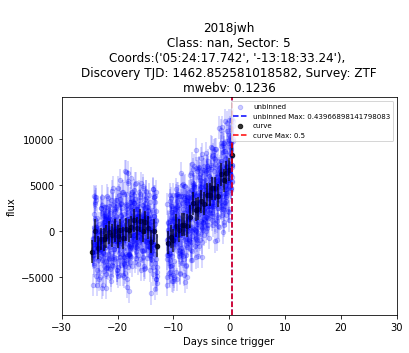

In [2]:
tess_plot("2018jwh", parameters)

## save tess plots of all curves with ztf data

In [10]:
save_all(light_curves)

2018fzi
2018grv
2018gxi
2018hgl
2018hka
2018hkb
2018hxq
2018hyy
2018ijn
2018ime
2018iti
2018itr
2018iwg
2018iyh
2018iyx
2018izg
2018jeb
2018jjs
2018jnd
2018jwh
2018kfv
2018koy
2018ksr
2018kvc
2018kwm
2018lit
2018lot
2019aba
2019aeu
2019axj
2019bip
2019bop
2019bwo
2019bwu
2019bxi
2019cxt
2019dhz
2019dke
2019dsn
2019fp
2019mdw
2019nnr
2019nvk
2019nvl
2019nzq
2019onn
2019ook
2019opz
2019osp
2019pac
2019pny
2019prm
2019prs
2019ptf
2019pzj
2019qhh
2019qmt
2019qqr
2019rdl
2019rj
2019rrc
2019ruc
2019ruf
2019rvx
2019slt
2019soh
2019sql
2019str
2019sts
2019swy
2019sxc
2019sxe
2019tfa
2019tfd
2019tjz
2019tta
2019ubi
2019udn
2019uen
2019ufy
2019uge
2019ugr
2019uje
2019ujq
2019ujw
2019ulr
2019ulw
2019uwj
2019uyn
2019vli
2019vlu
2019vyj
2019wjl
2019wkz
2019wla
2019wle
2019wz
2019xaq
2019xar
2019xcn
2019xul
2019zam
2019zes
2019zsi
2020aajf
2020aalz
2020aan
2020aarw
2020aatb
2020aauh
2020aawh
2020aawi
2020abqy
2020abq
2020abrp
2020abtd
2020abvc
2020abwb
2020abxl
2020acbc
2020acbf
2020accz
2020acdk
20